In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/LogisticRegression/')

In [3]:
# Use seaborn for pairplot
!pip install -q seaborn
#!cp /content/drive/MyDrive/LogisticRegression/Model.py 

# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from Model import LogisticRegressionUsingGD
from sklearn.metrics import accuracy_score

#!python --version

def load_data(path, header):
    dataframe = pd.read_csv(path, header=header)
    return dataframe

if __name__ == "__main__":
    # path /content/drive/MyDrive/Rail_Features_test80.csv
    data = load_data("/content/drive/MyDrive/Rail_Features_2_No_NULLs.csv",0)
    print(data.info())
    print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rail_candidate   3408 non-null   object 
 1   sigma            3408 non-null   float64
 2   overheight       3408 non-null   float64
 3   underheight      3408 non-null   float64
 4   underboth        3408 non-null   float64
 5   thickover        3408 non-null   int64  
 6   thickunder       3408 non-null   int64  
 7   filletover       3408 non-null   int64  
 8   filletunder      3408 non-null   int64  
 9   faceslope_angle  3408 non-null   int64  
 10  camera_ang       3408 non-null   int64  
 11  real_rail        3408 non-null   object 
dtypes: float64(4), int64(6), object(2)
memory usage: 319.6+ KB
None
  rail_candidate      sigma  overheight  ...  faceslope_angle  camera_ang  real_rail
0          RE115  35.830868   18.132426  ...                0           0      RE136
1         

##Inspect the Data

In [4]:
my_rail = '''RE136'''
data["target"] = np.where(data['real_rail']==my_rail,1,0).astype('int32')
data = data.drop(columns = ['rail_candidate','underboth','thickover','thickunder','filletover','filletunder','faceslope_angle','camera_ang'])
data = data[['sigma','overheight','underheight','target','real_rail']]
data.head(3)

,sigma,overheight,underheight,target,real_rail
0,35.830868,18.132426,21.396811,1,RE136
1,5.173964,11.306652,0.000000,1,RE136
2,0.689708,0.879124,21.396811,1,RE136


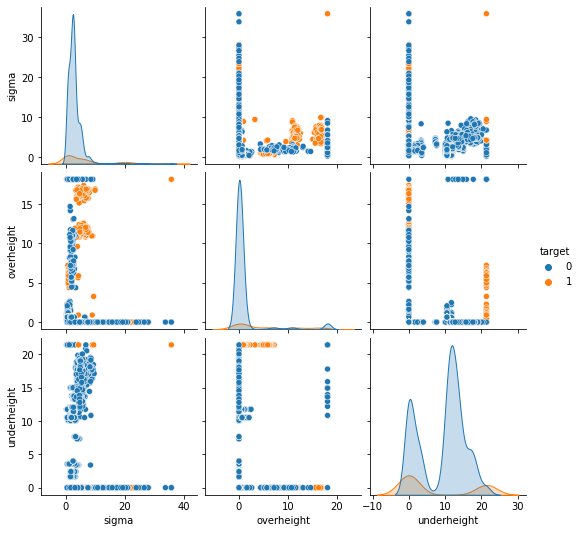

In [5]:
sns.pairplot(data, hue = 'target', diag_kind='kde')

In [6]:
 # X class 'pandas.core.frame.DataFrame' = feature values, all the columns except the last 2 columns. 
    
X = data.iloc[:, :-2]
#X = data.iloc[:, 0:1]
X.head(3)

    # y = target values, last column of the data frame
y = data.iloc[:, -2]
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


The accuracy of the model is 88.23356807511738
The model parameters using Gradient descent


[-2.63389728  0.13322194  0.15480021 -0.01673474]


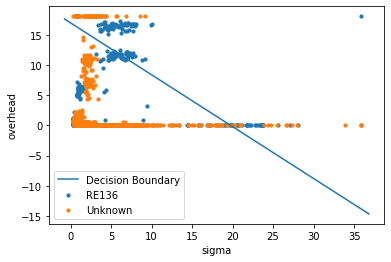

In [7]:
    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],s=10, label=my_rail)
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Unknown')
    
    # preparing the data for building the model
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)
    #print (X)
    x_values = [np.min(X[:, 1] -1 ), np.max(X[:, 1] + 1)]
    #print (x_values)
    y_values = - (parameters[0] + np.dot(parameters[1], x_values))/parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('sigma')
    plt.ylabel('overhead')
    plt.legend()
    plt.show()

In [8]:
    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X, y)
    parameters = model.coef_
    predicted_classes = model.predict(X)
    accuracy = accuracy_score(y.flatten(),predicted_classes)
    print('The accuracy score using scikit-learn is {}'.format(accuracy))
    print("The model parameters using scikit learn")
    print(parameters)

The accuracy score using scikit-learn is 0.8823356807511737
The model parameters using scikit learn
[[-1.54794477e-05  1.33203791e-01  1.54785771e-01 -1.67384503e-02]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
